# **1.Problem StateMent**

We are provided with a dataset containing details about various cars, including information about the company name, car name, fuel type, kilometers driven, and the price of the car. The objective is to build a regression model to predict the price of a car based on the given attributes. Specifically, the dataset contains the following features:


**Company Name**: The manufacturer or brand of the car.

**Car Name:** The specific model name of the car.

**Fuel Type:** The type of fuel used by the car (e.g., Petrol, Diesel, Electric).

**Kilometers Driven:** The total distance (in kilometers) that the car has been driven.

**Price:** The target variable, representing the price of the car.

   The goal is to develop a machine learning model that can accurately predict the price of a car, given its company name, car name, fuel type, and kilometers driven. This would assist car buyers and sellers in estimating the value of a used car based on its key characteristics.


# 2.Understanding the Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [ ]:
df=pd.read_csv('quikr_car.csv')
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [ ]:
# Check the shape of the dataset
print(f'Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')
#df.shape


Dataset contains 892 rows and 6 columns.


In [ ]:
print(df.duplicated().sum())

94


In [ ]:
print(df.isnull().sum())

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64


# 3.**Data Cleaning**

We will remove all duplicate rows from the dataset to ensure that each car entry is unique and that the model does not get biased or overfitted due to repetitive data. This step will help maintain the integrity of the dataset and improve the accuracy of predictions.

In [ ]:
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        798 non-null    object
 1   company     798 non-null    object
 2   year        798 non-null    object
 3   Price       798 non-null    object
 4   kms_driven  748 non-null    object
 5   fuel_type   745 non-null    object
dtypes: object(6)
memory usage: 43.6+ KB


### Data  Cleaning in **kms_driven**

In [ ]:
#Data Cleaning on 'Kms_driven"

df['kms_driven']=df['kms_driven'].str.replace(',','')#to repalce(',')  in kms_driven

df['kms_driven']=df['kms_driven'].str.replace('kms','')#to repalce('kms')  in kms_driven

print(df['kms_driven'].unique())# to find te unique values

df['kms_driven']=df['kms_driven'].fillna(df['kms_driven'][~((df['kms_driven']=='Petrol'))].notna().mean())

df['kms_driven'][((df['kms_driven']=='Petrol') )]=df['kms_driven'][~((df['kms_driven']=='Petrol'))].astype('int').mean()

df['kms_driven']=df['kms_driven'].astype('int')
df.info()

['45000 ' '40 ' '22000 ' '28000 ' '36000 ' '59000 ' '41000 ' '25000 '
 '24530 ' '60000 ' '30000 ' '32000 ' '48660 ' '4000 ' '16934 ' '43000 '
 '35550 ' '39522 ' '39000 ' '55000 ' '72000 ' '15975 ' '70000 ' '23452 '
 '35522 ' '48508 ' '15487 ' '82000 ' '20000 ' '68000 ' '38000 ' '27000 '
 '33000 ' '46000 ' '16000 ' '47000 ' '35000 ' '30874 ' '15000 ' '29685 '
 '130000 ' '19000 ' nan '54000 ' '13000 ' '38200 ' '50000 ' '13500 '
 '3600 ' '45863 ' '60500 ' '12500 ' '18000 ' '13349 ' '29000 ' '44000 '
 '42000 ' '14000 ' '49000 ' '36200 ' '51000 ' '104000 ' '33333 ' '33600 '
 '5600 ' '7500 ' '26000 ' '24330 ' '65480 ' '28028 ' '200000 ' '99000 '
 '2800 ' '21000 ' '11000 ' '66000 ' '3000 ' '7000 ' '38500 ' '37200 '
 '43200 ' '24800 ' '45872 ' '40000 ' '11400 ' '97200 ' '52000 ' '31000 '
 '175430 ' '37000 ' '65000 ' '3350 ' '75000 ' '62000 ' '73000 ' '2200 '
 '54870 ' '34580 ' '97000 ' '60 ' '80200 ' '3200 ' '0000 ' '5000 ' '588 '
 '71200 ' '175400 ' '9300 ' '56758 ' '10000 ' '56450 ' '56000 '

<ipython-input-8-190289dc21e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kms_driven']=df['kms_driven'].str.replace(',','')#to repalce(',')  in kms_driven
<ipython-input-8-190289dc21e5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kms_driven']=df['kms_driven'].str.replace('kms','')#to repalce('kms')  in kms_driven
<ipython-input-8-190289dc21e5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

### Data cleaning on 'Price;

In [ ]:
df['Price']=df['Price'].str.replace(',','')

print(df['Price'].unique())

df['Price'][((df['Price']=='Ask For Price'))]=df['Price'][~((df['Price']=='Ask For Price'))].astype('int').mean()

df['Price']=df['Price'].astype('int')
df.info()

['80000' '425000' 'Ask For Price' '325000' '575000' '175000' '190000'
 '830000' '250000' '182000' '315000' '415000' '320000' '1000000' '500000'
 '350000' '160000' '310000' '75000' '100000' '290000' '95000' '180000'
 '385000' '105000' '650000' '689999' '448000' '549000' '501000' '489999'
 '280000' '349999' '284999' '345000' '499999' '235000' '249999' '1475000'
 '395000' '220000' '170000' '85000' '200000' '570000' '110000' '448999'
 '1891111' '159500' '344999' '449999' '865000' '699000' '375000' '224999'
 '1200000' '195000' '351000' '240000' '90000' '155000' '600000' '189500'
 '210000' '390000' '135000' '1600000' '701000' '265000' '525000' '372000'
 '635000' '550000' '485000' '329500' '251111' '569999' '69999' '299999'
 '399999' '450000' '270000' '158400' '179000' '125000' '299000' '150000'
 '275000' '285000' '340000' '70000' '289999' '849999' '749999' '274999'
 '984999' '599999' '244999' '474999' '245000' '169500' '370000' '168000'
 '145000' '98500' '209000' '185000' '900000' '699999' '

<ipython-input-9-61c6d571c44b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price']=df['Price'].str.replace(',','')
<ipython-input-9-61c6d571c44b>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in 

### Data Cleaning in **Year**

In [ ]:
print(df['year'].unique())

['2007' '2006' '2018' '2014' '2015' '2012' '2013' '2016' '2010' '2017'
 '2008' '2011' '2019' '2009' '2005' '2000' '...' '150k' 'TOUR' '2003'
 'r 15' '2004' 'Zest' '/-Rs' 'sale' '1995' 'ara)' '2002' 'SELL' '2001'
 'tion' 'odel' '2 bs' 'arry' 'Eon' 'o...' 'ture' 'emi' 'car' 'able' 'no.'
 'd...' 'SALE' 'digo' 'sell' 'd Ex' 'n...' 'e...' 'D...' ', Ac' 'go .'
 'k...' 'o c4' 'zire' 'cent' 'Sumo' 'cab' 't xe' 'EV2' 'r...' 'zest']


In [ ]:
year_list=df['year'].unique()
def clean_year(year):
    try:
        year = int(year)
        if 1900 <= year <= 2023:  # Check if it's a reasonable year
             return year
        else:
             return np.nan
    except ValueError:
        return np.nan
# Apply the cleaning function to the 'year' column
df['year'] = df['year'].apply(clean_year)
print(df['year'].unique())
df['year'] =df['year'].fillna(df['year'].mode()[0])
df['year']=df['year'].astype('int')
df.info()

[2007. 2006. 2018. 2014. 2015. 2012. 2013. 2016. 2010. 2017. 2008. 2011.
 2019. 2009. 2005. 2000.   nan 2003. 2004. 1995. 2002. 2001.]
<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        798 non-null    object
 1   company     798 non-null    object
 2   year        798 non-null    int64 
 3   Price       798 non-null    int64 
 4   kms_driven  798 non-null    int64 
 5   fuel_type   745 non-null    object
dtypes: int64(3), object(3)
memory usage: 43.6+ KB


<ipython-input-11-86d7bb471ca3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].apply(clean_year)
<ipython-input-11-86d7bb471ca3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] =df['year'].fillna(df['year'].mode()[0])
<ipython-input-11-86d7bb471ca3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

Data Cleaning in Fuel Type

In [ ]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [ ]:
df['fuel_type']=df['fuel_type'].fillna(df['fuel_type'].mode()[0])
df['fuel_type'][df['fuel_type']==395824.73986928107]=df['fuel_type'].mode()[0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        798 non-null    object
 1   company     798 non-null    object
 2   year        798 non-null    int64 
 3   Price       798 non-null    int64 
 4   kms_driven  798 non-null    int64 
 5   fuel_type   798 non-null    object
dtypes: int64(3), object(3)
memory usage: 43.6+ KB


<ipython-input-13-07b763608604>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fuel_type']=df['fuel_type'].fillna(df['fuel_type'].mode()[0])
<ipython-input-13-07b763608604>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to pe

In [ ]:
dummies=pd.get_dummies(df['fuel_type']).astype(int)

In [ ]:
df=pd.concat([df, dummies],axis='columns')

In [ ]:
#drop the orginal variable
df.drop(['fuel_type'],axis='columns',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 891
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        798 non-null    object
 1   company     798 non-null    object
 2   year        798 non-null    int64 
 3   Price       798 non-null    int64 
 4   kms_driven  798 non-null    int64 
 5   Diesel      798 non-null    int64 
 6   LPG         798 non-null    int64 
 7   Petrol      798 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 56.1+ KB


### Cleaning the name and company

In [ ]:
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9',
       'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

In [ ]:
# Converting all the strings to numerical values using labelencoder class


df['name'] = labelencoder.fit_transform(df['name'])
df['company'] = labelencoder.fit_transform(df['company'])

# 4.Descriptive Statistics

In [ ]:
# Summary statistics for numerical columns
print(df.describe())

             name     company         year         Price     kms_driven  \
count  798.000000  798.000000   798.000000  7.980000e+02     798.000000   
mean   253.597744   20.057644  2012.567669  3.958247e+05   43558.966165   
std    141.572908    8.393652     4.062845  4.593554e+05   35449.363195   
min      0.000000    0.000000  1995.000000  3.000000e+04       0.000000   
25%    133.250000   14.000000  2010.000000  1.700000e+05   22000.000000   
50%    252.000000   21.000000  2014.000000  3.000000e+05   40000.000000   
75%    360.750000   22.000000  2015.000000  4.612500e+05   56000.000000   
max    524.000000   47.000000  2019.000000  8.500003e+06  400000.000000   

           Diesel         LPG      Petrol  
count  798.000000  798.000000  798.000000  
mean     0.427318    0.002506    0.570175  
std      0.494999    0.050031    0.495361  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    1.000000  
75%      1.00000

# **5.Data Visualisation**


(array([392., 320.,  57.,  16.,   9.,   3.,   0.,   0.,   0.,   1.]),
 array([     0.,  40000.,  80000., 120000., 160000., 200000., 240000.,
        280000., 320000., 360000., 400000.]),
 <BarContainer object of 10 artists>)

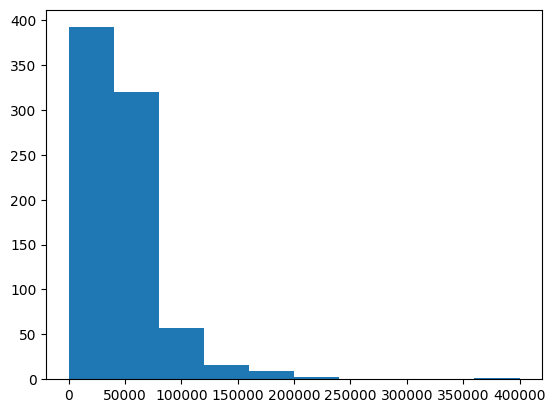

In [ ]:
plt.hist(df['kms_driven'])

(array([  2.,   0.,  17.,  24.,  34.,  84.,  98., 224., 213., 102.]),
 array([1995. , 1997.4, 1999.8, 2002.2, 2004.6, 2007. , 2009.4, 2011.8,
        2014.2, 2016.6, 2019. ]),
 <BarContainer object of 10 artists>)

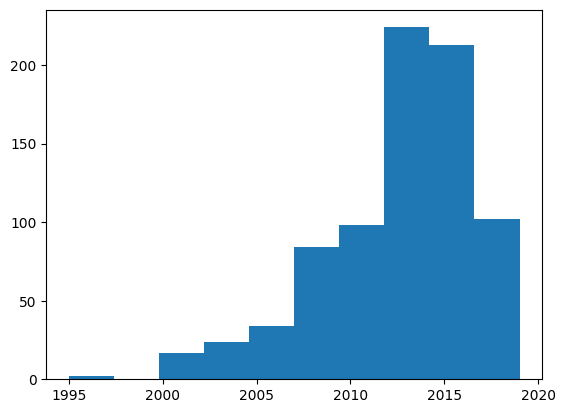

In [ ]:
plt.hist(df['year'])

<Axes: xlabel='kms_driven', ylabel='Count'>

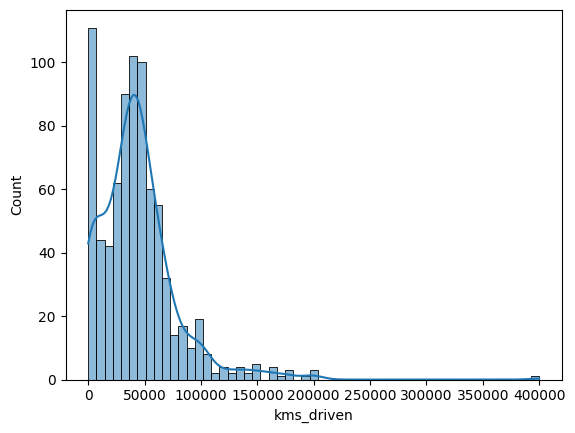

In [ ]:

sns.histplot(df['kms_driven'],kde=True)

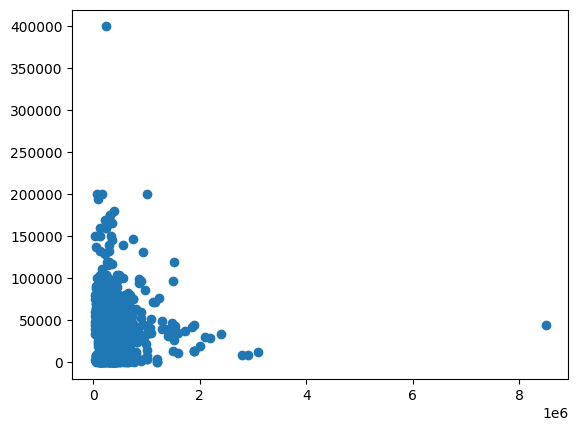

In [ ]:
plt.scatter(df['Price'],df['kms_driven'])

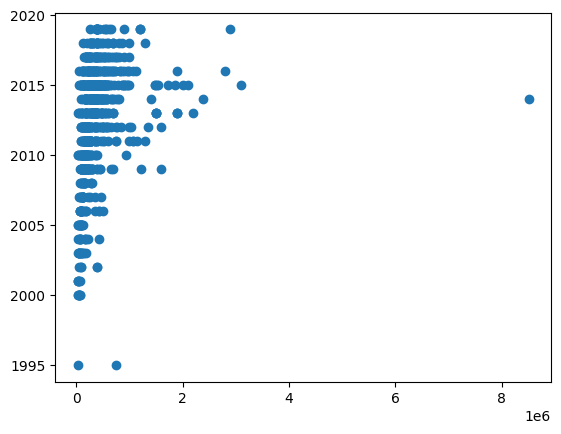

In [ ]:
plt.scatter(df['Price'],df['year'])

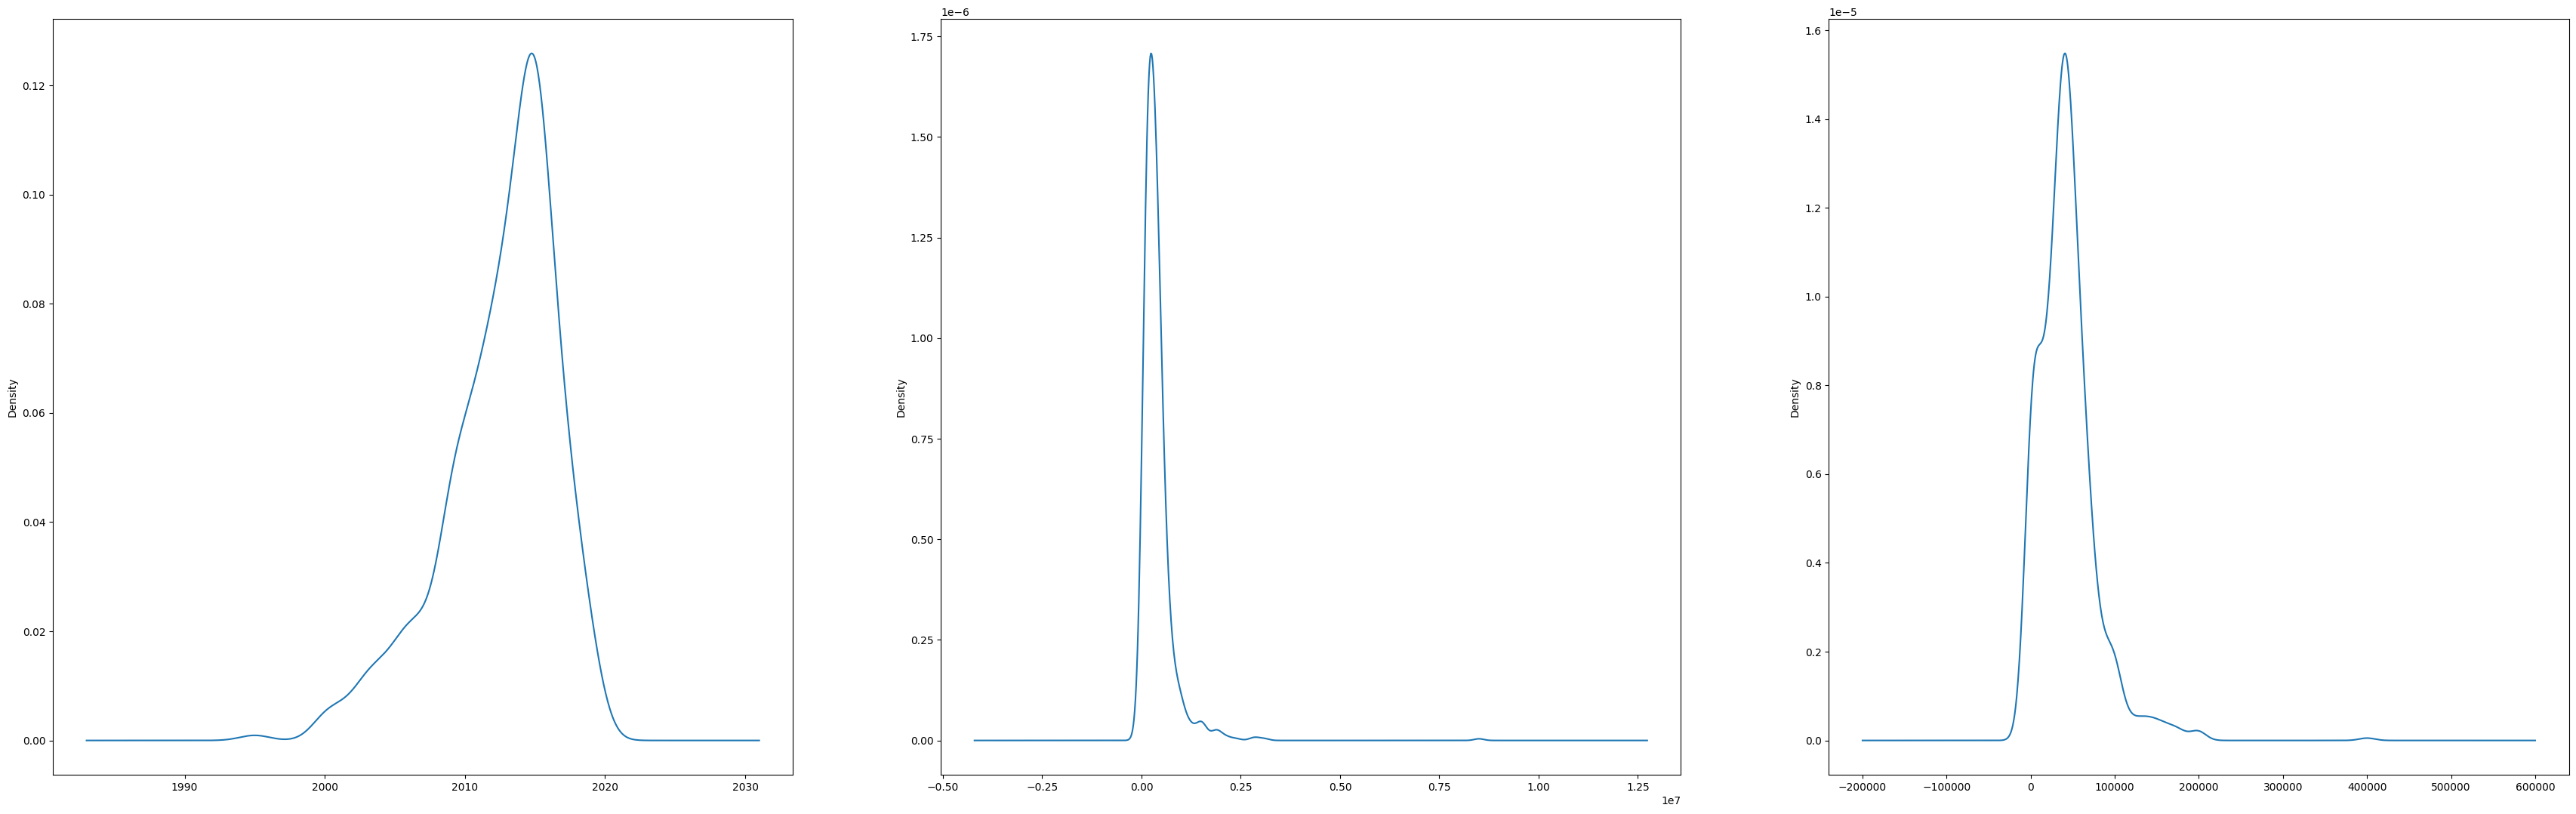

In [ ]:
plt.subplot(1,3,1)
df['year'].plot(kind='kde',figsize=(43,13))

plt.subplot(1,3,2)
df['Price'].plot(kind='kde')

plt.subplot(1,3,3)
df['kms_driven'].plot(kind='kde')
plt.show()

<Axes: ylabel='count'>

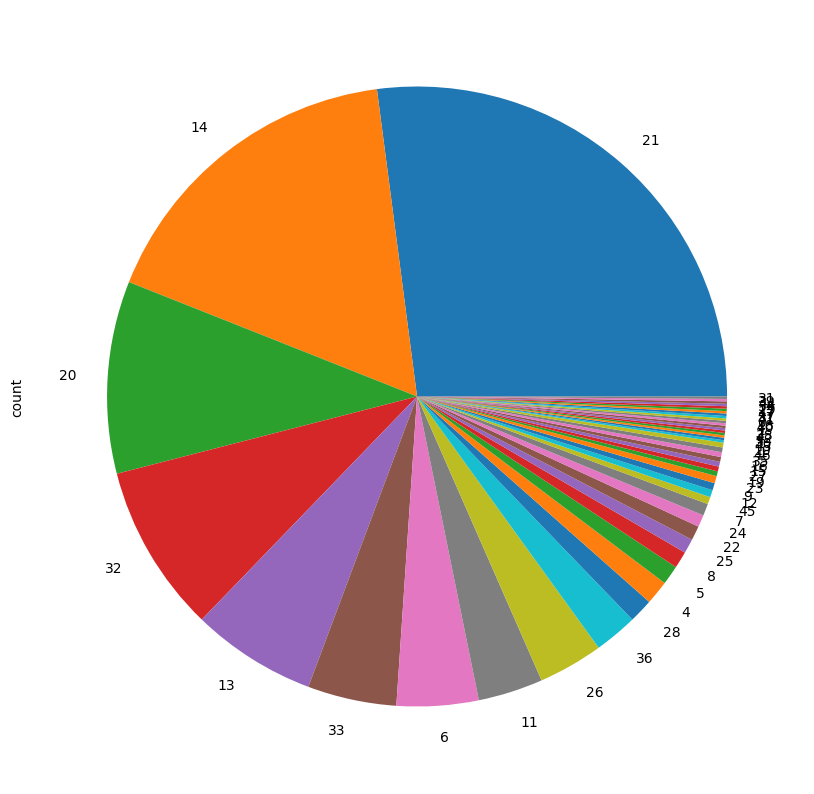

In [ ]:
df['company'].value_counts().plot(kind='pie',figsize=(10,20))

# 6.**outlier** **detection**

### year

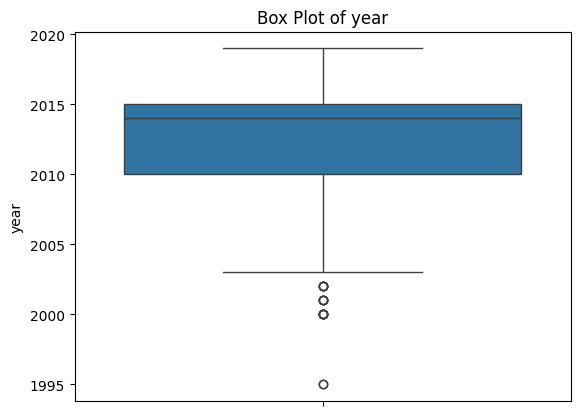

In [ ]:
# Visual detection of outliers using a box plot
sns.boxplot(df['year'])
plt.title('Box Plot of year')
plt.show()

In [ ]:
#calculate Q1,Q2,and Q3
Q1= np.quantile(df['year'],0.25)
Q2=np.quantile(df['year'],.5)
Q3=np.quantile(df['year'],0.75)

Q1,Q2,Q3

(2010.0, 2014.0, 2015.0)

In [ ]:
#calculate the IQR
IQR=Q3-Q1
IQR

5.0

In [ ]:
#calculate outliers boundaries
lower_bound=Q1-1.5*IQR
upper_bound =Q3+1.5*IQR
print('Lower bound  :',lower_bound)
print("upper Bound  :",upper_bound)

Lower bound  : 2002.5
upper Bound  : 2022.5


In [ ]:
#Identify Outliers
outliers=[x for x in df['year'] if x<lower_bound or x > upper_bound ]
#Any dat point below the Lower Bound or above the upper Bound is considered as an outliers

#output the results
outliers

[2000,
 2000,
 2000,
 1995,
 2002,
 2000,
 2001,
 2001,
 2001,
 2001,
 2002,
 2001,
 2000,
 2002,
 2002,
 1995,
 2002,
 2000,
 2000]

In [ ]:
df['year'].isin(outliers)

,year
0,False
1,False
2,False
3,False
4,False
...,...
887,False
888,False
889,False
890,False


In [ ]:
df=df[~df['year'].isin(outliers)]
df

,name,company,year,Price,kms_driven,Diesel,LPG,Petrol
0,154,14,2007,80000,45000,0,0,1
1,204,20,2006,425000,40,1,0,0
2,254,21,2018,395824,22000,0,0,1
3,143,14,2014,325000,28000,0,0,1
4,61,11,2014,575000,36000,1,0,0
...,...,...,...,...,...,...,...,...
887,406,31,2015,310000,0,0,0,1
888,460,32,2018,260000,27000,1,0,0
889,212,20,2013,390000,40000,1,0,0
890,82,13,2014,180000,43558,0,0,1


### price

In [ ]:
#calculate Q1,Q2,and Q3
Q1= np.quantile(df['Price'],0.25)
Q2=np.quantile(df['Price'],.5)
Q3=np.quantile(df['Price'],0.75)

Q1,Q2,Q3

(178500.0, 300000.0, 474999.5)

In [ ]:
#calculate the IQR

IQR=Q3-Q1
IQR

296499.5

In [ ]:
#calculate outliers boundaries
lower_bound=Q1-1.5*IQR
upper_bound =Q3+1.5*IQR
print('Lower bound  :',lower_bound)
print("upper Bound  :",upper_bound)

Lower bound  : -266249.25
upper Bound  : 919748.75


In [ ]:
#Identify Outliers
outliers=[x for x in df['Price'] if x<lower_bound or x > upper_bound ]
#Any dat point below the Lower Bound or above the upper Bound is considered as an outliers

#output the results
outliers

[1000000,
 1475000,
 1891111,
 1891111,
 1200000,
 1600000,
 984999,
 2000000,
 2100000,
 1400000,
 1891111,
 944999,
 1350000,
 1074999,
 1000000,
 1130000,
 950000,
 1000000,
 1200000,
 940000,
 1500000,
 1299000,
 1499000,
 1540000,
 1525000,
 2800000,
 1000000,
 1599000,
 1150000,
 8500003,
 1299000,
 950000,
 1065000,
 2190000,
 2390000,
 1075000,
 1025000,
 1900000,
 1490000,
 1000000,
 1510000,
 1850000,
 1725000,
 1000000,
 1225000,
 970000,
 3100000,
 1499000,
 1200000,
 2900000]

In [ ]:
df=df[~df['Price'].isin(outliers)]
df

,name,company,year,Price,kms_driven,Diesel,LPG,Petrol
0,154,14,2007,80000,45000,0,0,1
1,204,20,2006,425000,40,1,0,0
2,254,21,2018,395824,22000,0,0,1
3,143,14,2014,325000,28000,0,0,1
4,61,11,2014,575000,36000,1,0,0
...,...,...,...,...,...,...,...,...
887,406,31,2015,310000,0,0,0,1
888,460,32,2018,260000,27000,1,0,0
889,212,20,2013,390000,40000,1,0,0
890,82,13,2014,180000,43558,0,0,1


### kms_driven

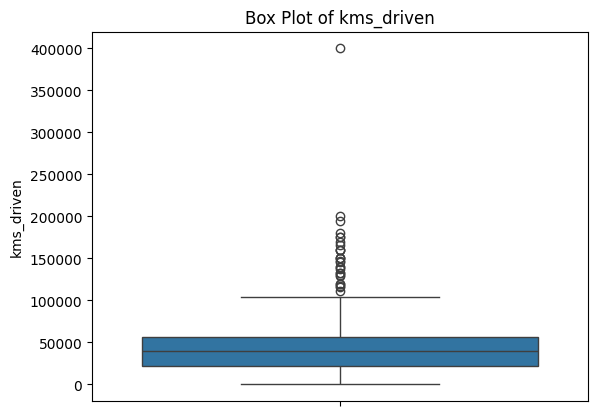

In [ ]:
# Visual detection of outliers using a box plot
sns.boxplot(df['kms_driven'])
plt.title('Box Plot of kms_driven')
plt.show()

In [ ]:
#calculate Q1,Q2,and Q3
Q1= np.quantile(df['kms_driven'],0.25)
Q2=np.quantile(df['kms_driven'],.5)
Q3=np.quantile(df['kms_driven'],0.75)

Q1,Q2,Q3

(22000.0, 40000.0, 56000.0)

In [ ]:
#calculate the IQR
IQR=Q3-Q1
IQR

34000.0

In [ ]:
#calculate outliers boundaries
lower_bound=Q1-1.5*IQR
upper_bound =Q3+1.5*IQR
print('Lower bound  :',lower_bound)
print("upper Bound  :",upper_bound)

Lower bound  : -29000.0
upper Bound  : 107000.0


In [ ]:
#Identify Outliers
outliers=[x for x in df['kms_driven'] if x<lower_bound or x > upper_bound ]
#Any dat point below the Lower Bound or above the upper Bound is considered as an outliers

#output the results
outliers

[130000,
 175430,
 175400,
 160000,
 170000,
 400000,
 166000,
 129000,
 111111,
 160000,
 140000,
 180000,
 133000,
 117000,
 150000,
 140000,
 195000,
 200000,
 160000,
 147000,
 116000,
 120000,
 150000,
 137495,
 120000,
 146000,
 150000,
 132000]

In [ ]:
df=df[~df['kms_driven'].isin(outliers)]
df

,name,company,year,Price,kms_driven,Diesel,LPG,Petrol
0,154,14,2007,80000,45000,0,0,1
1,204,20,2006,425000,40,1,0,0
2,254,21,2018,395824,22000,0,0,1
3,143,14,2014,325000,28000,0,0,1
4,61,11,2014,575000,36000,1,0,0
...,...,...,...,...,...,...,...,...
887,406,31,2015,310000,0,0,0,1
888,460,32,2018,260000,27000,1,0,0
889,212,20,2013,390000,40000,1,0,0
890,82,13,2014,180000,43558,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 701 entries, 0 to 891
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   name        701 non-null    int64
 1   company     701 non-null    int64
 2   year        701 non-null    int64
 3   Price       701 non-null    int64
 4   kms_driven  701 non-null    int64
 5   Diesel      701 non-null    int64
 6   LPG         701 non-null    int64
 7   Petrol      701 non-null    int64
dtypes: int64(8)
memory usage: 49.3 KB


# 7.**Corelaation** **analysis**

In [ ]:
Corr_matrix=df[['Price','year','kms_driven']].corr()

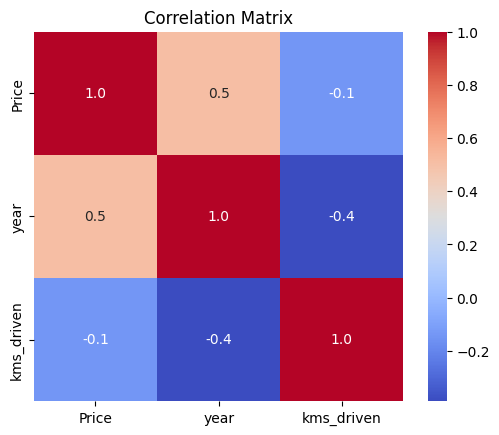

In [ ]:
# Heatmap of correlation matrix
#sns.heatmap(corr_matrix, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs))
sns.heatmap(Corr_matrix,annot=True, fmt='0.01f', cmap='coolwarm',annot_kws=None, linewidths=0, robust=True,square=True) # 0.01f should be given for float values, d for integers
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.head()

,name,company,year,Price,kms_driven,Diesel,LPG,Petrol
0,154,14,2007,80000,45000,0,0,1
1,204,20,2006,425000,40,1,0,0
2,254,21,2018,395824,22000,0,0,1
3,143,14,2014,325000,28000,0,0,1
4,61,11,2014,575000,36000,1,0,0


In [ ]:
Corr_matrix=df.corr()

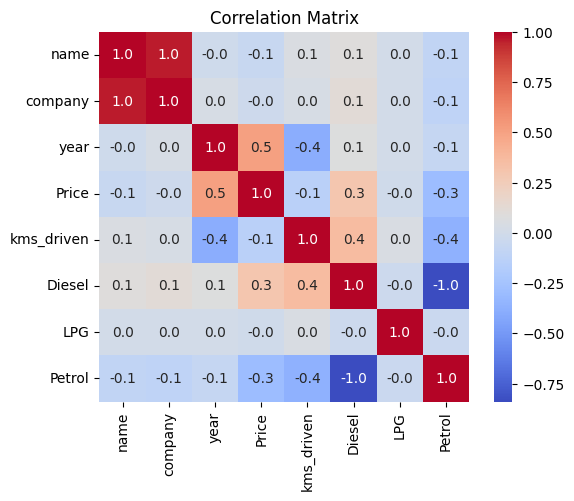

In [ ]:
# Heatmap of correlation matrix
#sns.heatmap(corr_matrix, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs))
sns.heatmap(Corr_matrix,annot=True, fmt='0.01f', cmap='coolwarm',annot_kws=None, linewidths=0, robust=True,square=True) # 0.01f should be given for float values, d for integers
plt.title('Correlation Matrix')
plt.show()

# **8.Feature Engineering**

In [ ]:
df.drop(['name'],axis=1,inplace=True)

<ipython-input-188-44b113994344>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['name'],axis=1,inplace=True)


In [ ]:
df['Used_year']=2024-df['year']
df

<ipython-input-189-5ba3f89b5147>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Used_year']=2024-df['year']


,company,year,Price,kms_driven,Diesel,LPG,Petrol,Used_year
0,14,2007,80000,45000,0,0,1,17
1,20,2006,425000,40,1,0,0,18
2,21,2018,395824,22000,0,0,1,6
3,14,2014,325000,28000,0,0,1,10
4,11,2014,575000,36000,1,0,0,10
...,...,...,...,...,...,...,...,...
887,31,2015,310000,0,0,0,1,9
888,32,2018,260000,27000,1,0,0,6
889,20,2013,390000,40000,1,0,0,11
890,13,2014,180000,43558,0,0,1,10


In [ ]:
df2=df.copy()
df2=df2.drop('year',axis=1)

In [ ]:
df2

,company,Price,kms_driven,Diesel,LPG,Petrol,Used_year
0,14,80000,45000,0,0,1,17
1,20,425000,40,1,0,0,18
2,21,395824,22000,0,0,1,6
3,14,325000,28000,0,0,1,10
4,11,575000,36000,1,0,0,10
...,...,...,...,...,...,...,...
887,31,310000,0,0,0,1,9
888,32,260000,27000,1,0,0,6
889,20,390000,40000,1,0,0,11
890,13,180000,43558,0,0,1,10


In [ ]:

x=[]
for i in df2['kms_driven']:
  if i==0:
    x.append('fresh')
  else:
    x.append('used')

df2['fresh/used']=x
print(df2.to_string())

     company   Price  kms_driven  Diesel  LPG  Petrol  Used_year fresh/used
0         14   80000       45000       0    0       1         17       used
1         20  425000          40       1    0       0         18       used
2         21  395824       22000       0    0       1          6       used
3         14  325000       28000       0    0       1         10       used
4         11  575000       36000       1    0       0         10       used
5         11  395824       59000       1    0       0          9       used
6         11  175000       41000       1    0       0         12       used
7         14  190000       25000       0    0       1         11       used
8         11  830000       24530       1    0       0          8       used
9         21  250000       60000       0    0       1          9       used
10        28  182000       60000       0    0       1         14       used
11        21  315000       30000       0    0       1          9       used
12        14

In [ ]:

df2['fresh/used'] = labelencoder.fit_transform(df2['fresh/used'])
df2

,company,Price,kms_driven,Diesel,LPG,Petrol,Used_year,fresh/used
0,14,80000,45000,0,0,1,17,1
1,20,425000,40,1,0,0,18,1
2,21,395824,22000,0,0,1,6,1
3,14,325000,28000,0,0,1,10,1
4,11,575000,36000,1,0,0,10,1
...,...,...,...,...,...,...,...,...
887,31,310000,0,0,0,1,9,0
888,32,260000,27000,1,0,0,6,1
889,20,390000,40000,1,0,0,11,1
890,13,180000,43558,0,0,1,10,1


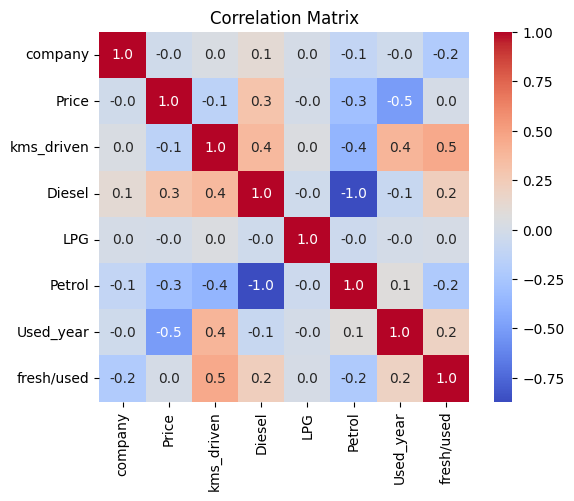

In [ ]:
# Heatmap of correlation matrix
Corr_matrix=df2.corr()
#sns.heatmap(corr_matrix, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs))
sns.heatmap(Corr_matrix,annot=True, fmt='0.01f', cmap='coolwarm',annot_kws=None, linewidths=0, robust=True,square=True) # 0.01f should be given for float values, d for integers
plt.title('Correlation Matrix')
plt.show()

Train the model

# 9.Dimentionality Reduction

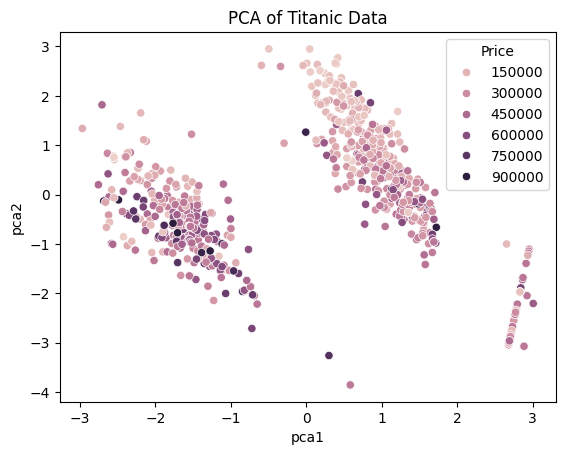

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features before PCA
features = ['company','kms_driven','Diesel','LPG','Petrol','Used_year','fresh/used']
X = StandardScaler().fit_transform(df2[features])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Add PCA results to the DataFrame
df2['pca1'] = pca_result[:, 0]
df2['pca2'] = pca_result[:, 1]

# Visualize PCA results
sns.scatterplot(x='pca1', y='pca2', hue='Price', data=df2)
plt.title('PCA of Titanic Data')
plt.show()

# 10 Data Scaling

In [ ]:
 from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
df2[['company','kms_driven','Diesel','LPG','Petrol','Used_year','fresh/used','Price']] = minmax_scaler.fit_transform(df2[['company','kms_driven','Diesel','LPG','Petrol','Used_year','fresh/used','Price']])
df2

,company,Price,kms_driven,Diesel,LPG,Petrol,Used_year,fresh/used,pca1,pca2
0,0.297872,0.055300,0.432692,0.0,0.0,1.0,0.7500,1.0,0.607545,1.925019
1,0.425532,0.452765,0.000385,1.0,0.0,0.0,0.8125,1.0,-1.033497,-0.117496
2,0.446809,0.419152,0.211538,0.0,0.0,1.0,0.0625,1.0,1.298764,-0.490055
3,0.297872,0.337558,0.269231,0.0,0.0,1.0,0.3125,1.0,1.115125,0.536442
4,0.234043,0.625576,0.346154,1.0,0.0,0.0,0.3125,1.0,-1.381684,-0.497909
...,...,...,...,...,...,...,...,...,...,...
887,0.659574,0.320276,0.000000,0.0,0.0,1.0,0.2500,0.0,2.773616,-2.386792
888,0.680851,0.262673,0.259615,1.0,0.0,0.0,0.0625,1.0,-1.226242,-2.147657
889,0.425532,0.412442,0.384615,1.0,0.0,0.0,0.3750,1.0,-1.534282,-0.647442
890,0.276596,0.170507,0.418827,0.0,0.0,1.0,0.3125,1.0,0.845509,0.812255


# 12. initial modelling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Define features and target variable
X = df2[['company','kms_driven','Diesel','LPG','Petrol','Used_year','fresh/used']]
y = df2['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Importing the metrics (measurements) for linear regression algorithms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Standardize the dataset (only for some algorithms like SVR and Neural network-which gives better results )
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# List of linear regression models to apply
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}


# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [ ]:
# Dictionary to store the results
results = {}


# Apply each model and compute metrics
for name, model in models.items(): # When you call items() on a dictionary, returns a list of the dictionary’s key-value tuple pairs.
                                   # Here "name" represents the "key", and "model" represents the "value"
  if name in ["Support Vector Regressor", "Neural Network"]: # Standardised value is only applied to support vector regressor and Neural network
        # Apply scaling for models that need it
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
  else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute evaluation metrics
  mae, rmse, r2 = evaluate_model(y_test, y_pred)
  results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2} # name represents the "key" of the dictionary. Here key is the name of the algorithms
  # In the new dictionary "results", the key is the name of the algorithm; and the "key" is the MAE, RMSE,and R2 values
  # results[name] will be the different key when the name of the algorithm changes


# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                               MAE      RMSE        R²
Linear Regression         0.147287  0.191717  0.286443
Ridge Regression          0.146965  0.191482  0.288191
Lasso Regression          0.189381  0.227011 -0.000468
ElasticNet Regression     0.189381  0.227011 -0.000468
Decision Tree             0.122113  0.175945  0.399019
Random Forest             0.117633  0.155737  0.529136
Gradient Boosting         0.114157  0.153113  0.544873
Support Vector Regressor  0.137058  0.181162  0.362850
K-Nearest Neighbors       0.135128  0.175312  0.403330
Neural Network            0.140370  0.183637  0.345317


In [ ]:
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred=model.predict(X_test)
accuracy=r2_score(y_test,y_pred)
print(accuracy)

0.5267049595849321


In [ ]:
from sklearn.metrics import mean_absolute_error
svm_mae = mean_absolute_error(y_test,y_pred)
print(" Mean Absolute Error:",svm_mae)

from sklearn.metrics import mean_squared_error
from math import sqrt
#calculate the mean absolute error
#svm_mae = mean_absolute_error(y_test,svm_prediction)
mse=mean_squared_error(y_test,y_pred)


#Print the mean absolute error
print(f' Mean square :{mse}')

 Mean Absolute Error: 0.118239910224296
 Mean square :0.024379381167170408


In [ ]:


# Assuming y_test and y_pred are your true and predicted values respectively
def percentage_error(y_true, y_pred):
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate and print the percentage error
percentage_error_value = percentage_error(y_test, y_pred)
print("Percentage Error:", percentage_error_value)

Percentage Error: 72.03886020616063


# Result and documentation

In [ ]:
# Summarize key findings
summary = {
    'Dataset Shape': df2.shape,
    'Missing Values': df2.isnull().sum().sum(),
    'Correlation with Price': df2.corr()['Price'].sort_values(ascending=False)
}
print("EDA Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")

final_df = df2

EDA Summary:
Dataset Shape: (701, 10)
Missing Values: 0
Correlation with Price: Price         1.000000
Diesel        0.299218
fresh/used    0.006764
LPG          -0.006305
company      -0.026727
kms_driven   -0.141622
pca1         -0.149052
Petrol       -0.298555
pca2         -0.429571
Used_year    -0.506578
Name: Price, dtype: float64


# Car Price Prediction Model Evaluation Report

Objective:

The goal is to build a regression model to predict the price of a car based on the following attributes:

* Company Name: The car manufacturer or brand.
* Car Name: The specific model of the car.
* Fuel Type: The type of fuel used by the car (e.g., Petrol, Diesel, Electric).
* Kilometers Driven: The total distance driven by the car.
* Price: The target variable, representing the price of the car.


Data Preprocessing Steps:

Data Cleaning:

* Missing values were handled without dropping any rows or columns.
* Outliers were removed from the following features:
    * Year: Outliers related to unusually high or low car manufacturing years.
    * Kilometers Driven: Extreme values were removed to avoid distorting the price prediction.
    * Price: Outliers that were significantly far from the rest of the data were removed to improve model stability.
* Feature Engineering:
    * PCA (Principal Component Analysis): This technique was applied to reduce dimensionality and capture the most variance in the data. However, PCA did not lead to a significant improvement in the model's performance.
* Scaling:

The features were scaled to bring them to a similar magnitude, ensuring better performance of machine learning algorithms.
* Modeling:

A Random Forest Regressor was used as the main machine learning model for prediction, based on its ability to handle non-linear relationships and interactions between features.

* Model Performance:

    * R² Score: 0.543 – The model explains about 54.3% of the variance in car prices, indicating moderate predictive power.
    * Mean Absolute Error (MAE): $100,570 – On average, predictions deviate by around $100,570 from the actual prices.
    * Mean Squared Error (MSE): 17.7 billion – A high MSE suggests the model is making large errors, especially for higher-priced cars.
    * Percentage Error: 42.69% – On average, the model’s predictions are off by 43% of the actual price.


* Key Findings & Insights:
    * The Model’s Performance: The Random Forest Regressor performed reasonably well with an R² of 0.543 but still leaves much room for improvement. The relatively high MAE and MSE indicate that the model struggles with predicting higher-end car prices, likely due to the presence of outliers or extreme values.

    * Feature Importance: The model likely benefited from the inclusion of Kilometers Driven as a key predictor. However, Company Name, Car Name, and Fuel Type may need better encoding or more sophisticated handling to improve the model’s predictive accuracy.

    * Outliers and Data Distribution: The removal of outliers in features such as Kilometers Driven and Price seems to have reduced the impact of extreme values, but they may still be influencing model performance in subtle ways, as seen in the MSE.

*  Conclusion

While the Random Forest Regressor has shown decent performance, with an R² score of 0.543, there is substantial room for improvement. The large errors (both in terms of MAE and percentage error) suggest that more advanced preprocessing, feature engineering, and model optimization are needed to build a more accurate car price prediction model.